## Importaciones

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn; assert sklearn.__version__ >= "0.20"

# Tamaño del texto en las etiquetas por defecto
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Obtención de datos

In [2]:
fichero = "C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Sistemas de Aprendizaxe Automático\\archivos\\winequality-red.csv"
datos = pd.read_csv(fichero)

## Estudio de los datos
### Información general de los datos

In [25]:
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
datos.size

19188

In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


En este dataset no hay datos **null** ya que se puede verificar arriba que todos los datos non_null tienen la misma cantidad. 

### Análisis estadístico simple

In [3]:
datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Histograma de todas las columnas
Se observará los picos ***extraños***

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

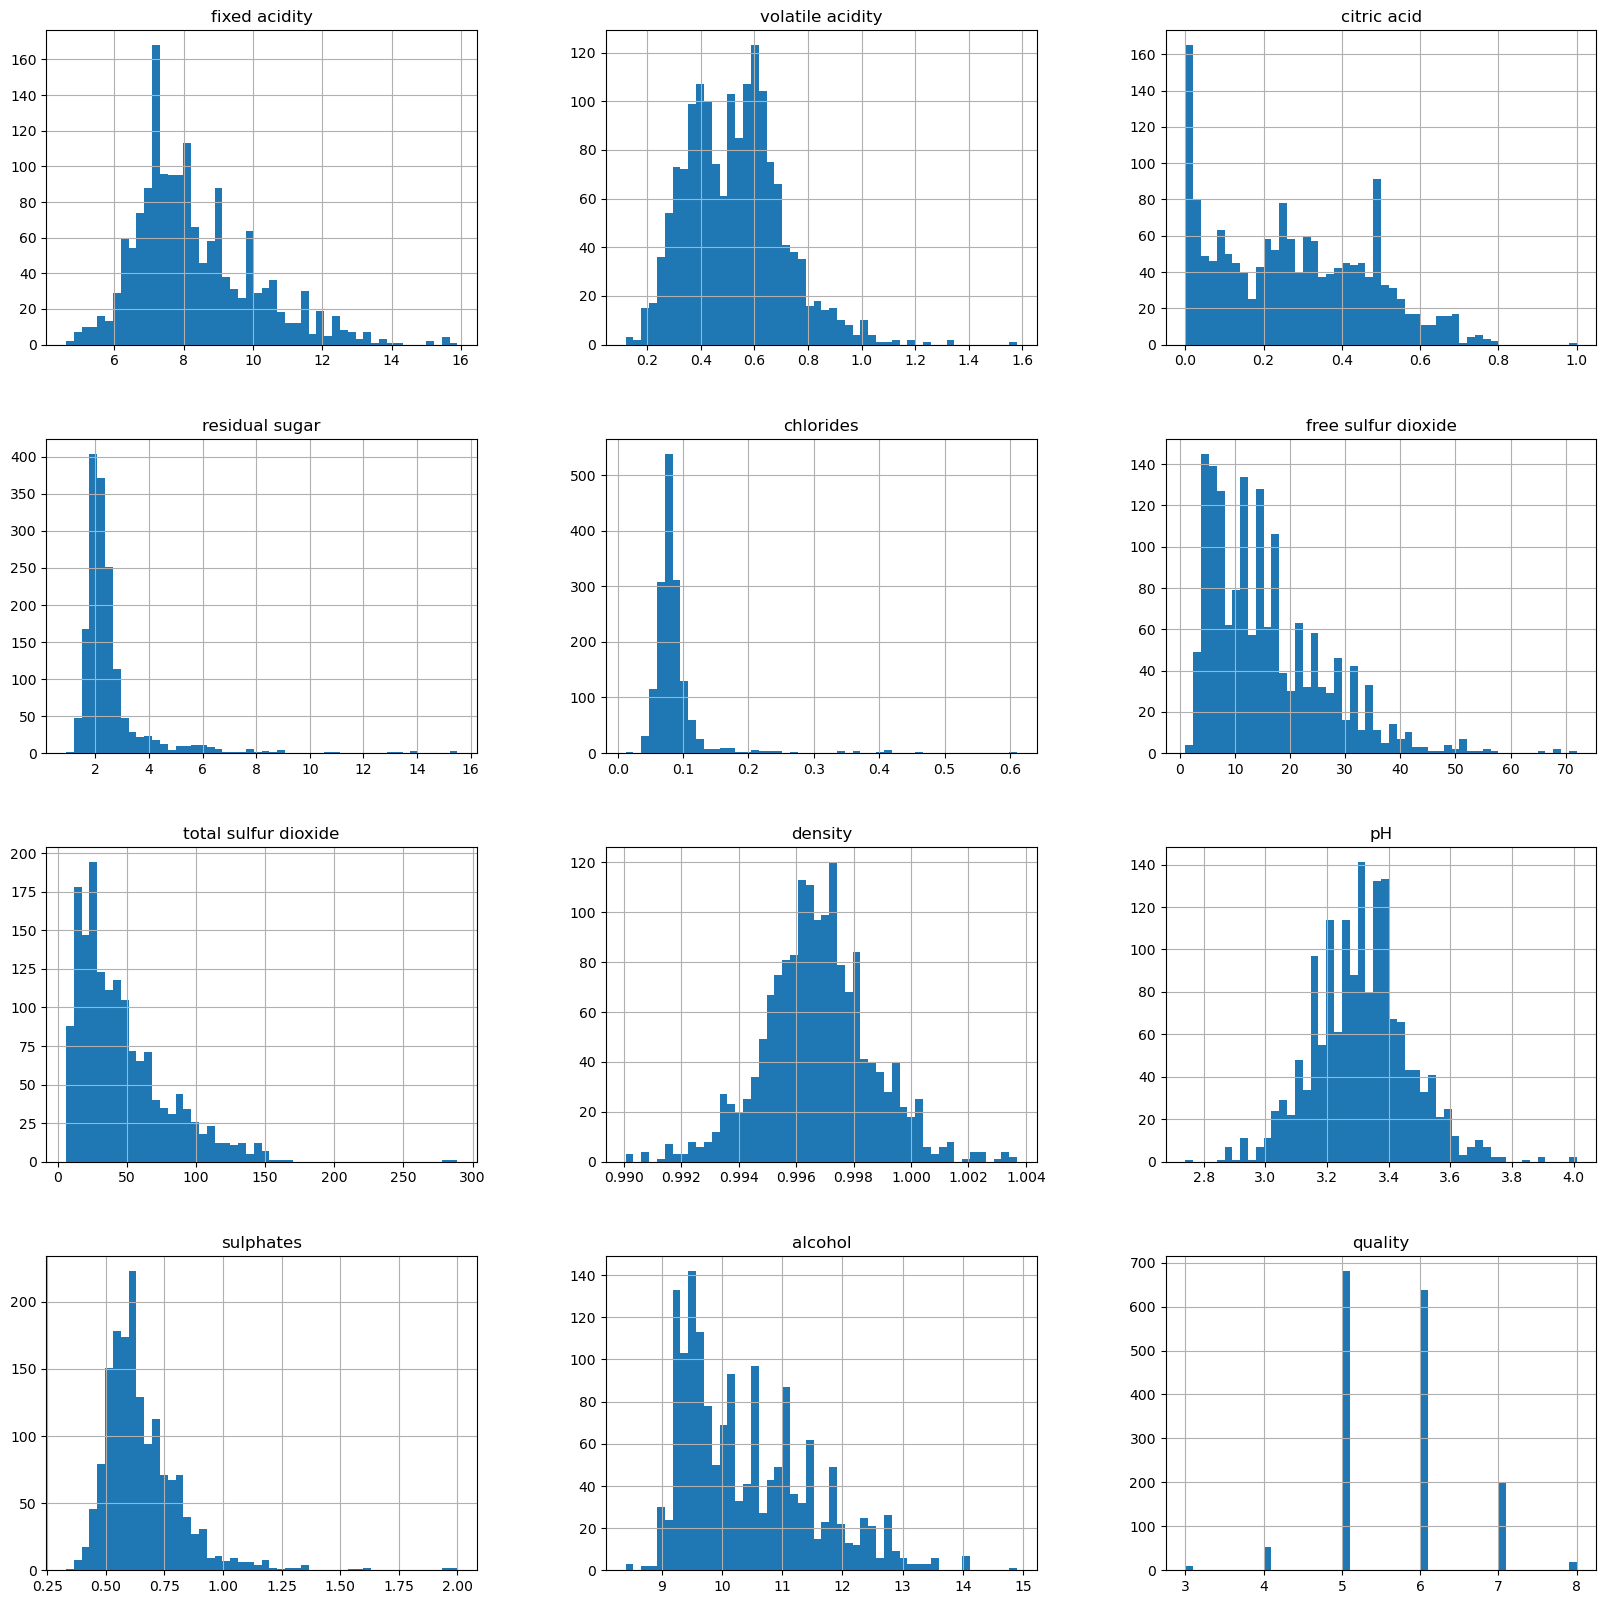

In [28]:
datos.hist(bins=50, figsize=(20, 20))

## Descubriendo y visualizando datos

> Histograma scatter que mostrará en el eje X el alcohol y en el eje Y la acidez, y en el color de los puntos la calidad

<Axes: xlabel='alcohol', ylabel='pH'>

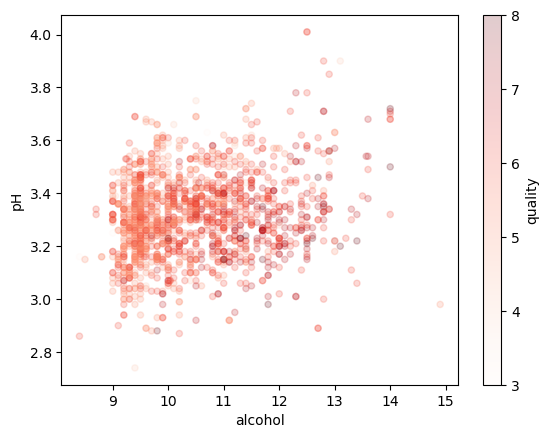

In [29]:
datos.plot(kind="scatter", x = "alcohol", y = "pH",
           alpha=0.2,
           c="quality",
           cmap="Reds")

> Histogramas que muestran cada característica de los vinos filtrados por cada nivel de calidad.

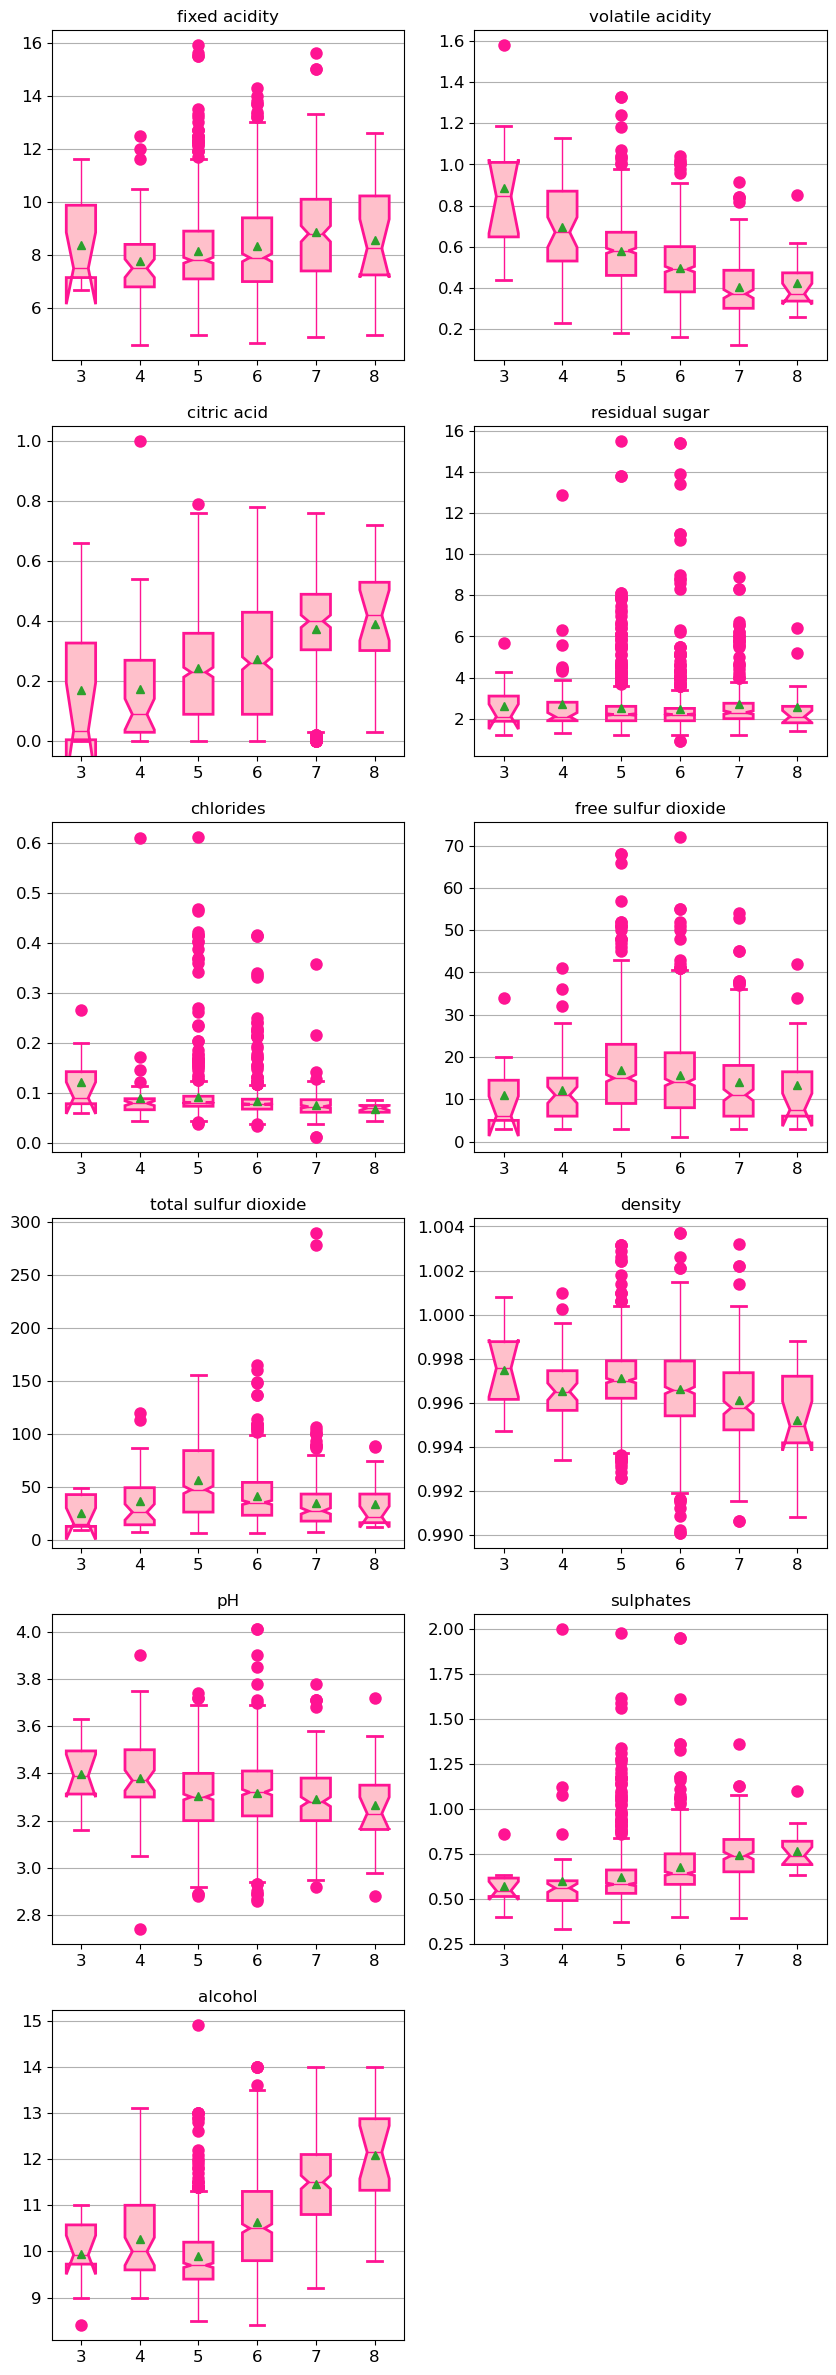

In [28]:
datos = pd.read_csv(fichero)

from BoxPlot import BoxPlot

BoxPlot.box_plot(types=datos.columns,by="quality",dataFrame=datos,deepColor="deeppink",faceColor="Pink",color="Pink",ballsColor="deeppink")

### Matriz de correlación y mapa de calor

In [4]:
corr_matrix = datos.corr()

Foco en las correlaciones de la columna de calidad con el resto de las columnas numéricas.

In [5]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

### Scatter cruzado de las columnas más prometedoras

array([[<Axes: xlabel='quality', ylabel='quality'>,
        <Axes: xlabel='alcohol', ylabel='quality'>,
        <Axes: xlabel='sulphates', ylabel='quality'>,
        <Axes: xlabel='citric acid', ylabel='quality'>,
        <Axes: xlabel='fixed acidity', ylabel='quality'>],
       [<Axes: xlabel='quality', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='fixed acidity', ylabel='alcohol'>],
       [<Axes: xlabel='quality', ylabel='sulphates'>,
        <Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
        <Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='fixed acidity', ylabel='sulphates'>],
       [<Axes: xlabel='quality', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
 

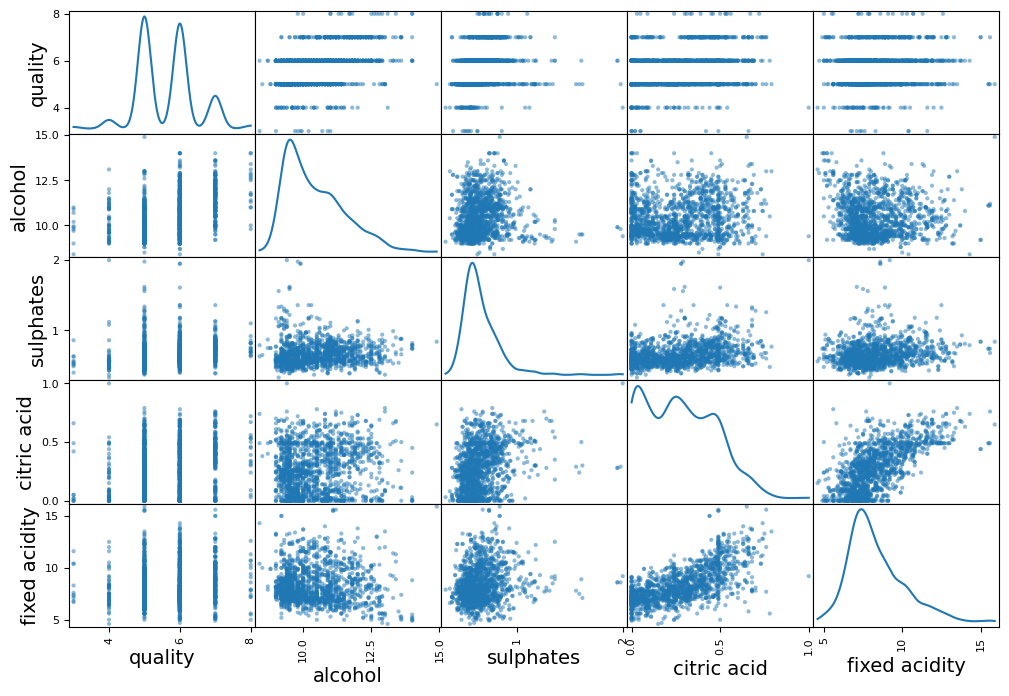

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "sulphates", "citric acid", "fixed acidity"]
scatter_matrix(datos[attributes], figsize=(12,8), diagonal='kde')

La columna con más correlación que tiene la calidad es el alcohol (0.476166), se puede ver que no es muy elevada.

<Axes: xlabel='quality', ylabel='alcohol'>

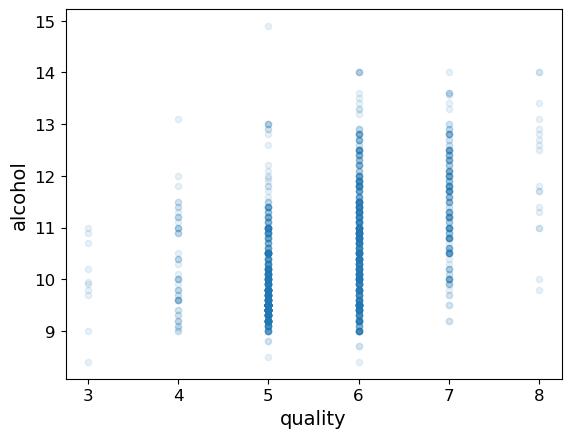

In [18]:
datos.plot(kind="scatter", x="quality", y="alcohol", alpha=0.1)
# plt.axis([0, 16, 0, 9])

### Mapa de calor de la matriz de correlación

<Axes: >

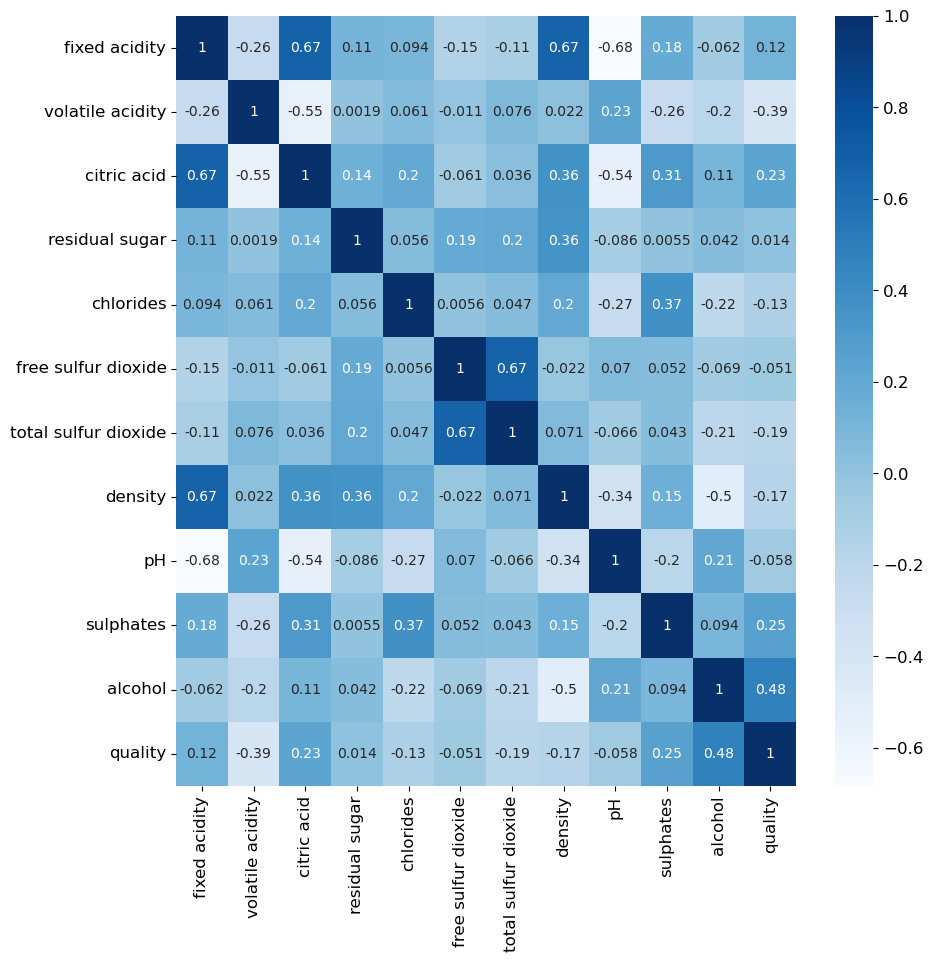

In [16]:
import seaborn as sns

plt.figure(figsize=(10,10))

sns.heatmap(corr_matrix, annot=True, cmap="Blues")   # El annot es para mostrar los datos

## Experimentando con operaciones con columnas

In [20]:
datos["ph_per_density"] = datos["pH"]/datos["density"]
datos["sulphates_per_alcohol"] = datos["sulphates"]/datos["alcohol"]
datos["residualsugar_per_alcohol"] = datos["residual sugar"]/datos["alcohol"]

In [21]:
corr_matrix = datos.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                      1.000000
alcohol                      0.476166
sulphates                    0.251397
citric acid                  0.226373
fixed acidity                0.124052
sulphates_per_alcohol        0.061409
residual sugar               0.013732
ph_per_density              -0.049734
free sulfur dioxide         -0.050656
pH                          -0.057731
residualsugar_per_alcohol   -0.065374
chlorides                   -0.128907
density                     -0.174919
total sulfur dioxide        -0.185100
volatile acidity            -0.390558
Name: quality, dtype: float64

En este caso, ninguna de las nuevas columnas con las que experimentamos posee un índice de correlación superior al de sis precursoras.

<Axes: xlabel='sulphates_per_alcohol', ylabel='quality'>

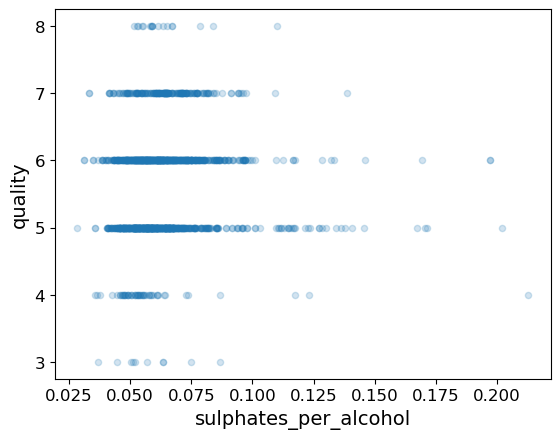

In [22]:
datos.plot(kind="scatter", x="sulphates_per_alcohol", y="quality", alpha=0.2)

<Axes: xlabel='ph_per_density', ylabel='quality'>

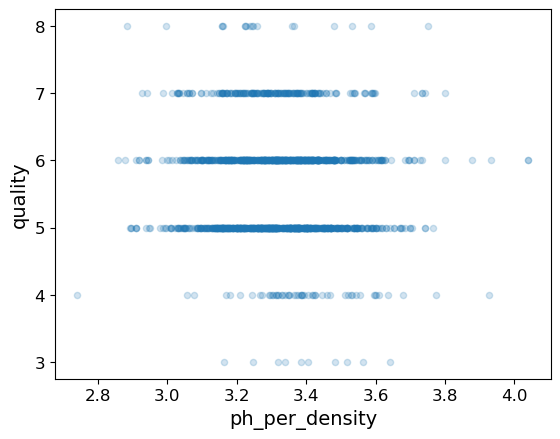

In [23]:
datos.plot(kind="scatter", x="ph_per_density", y="quality", alpha=0.2)

<Axes: xlabel='residualsugar_per_alcohol', ylabel='quality'>

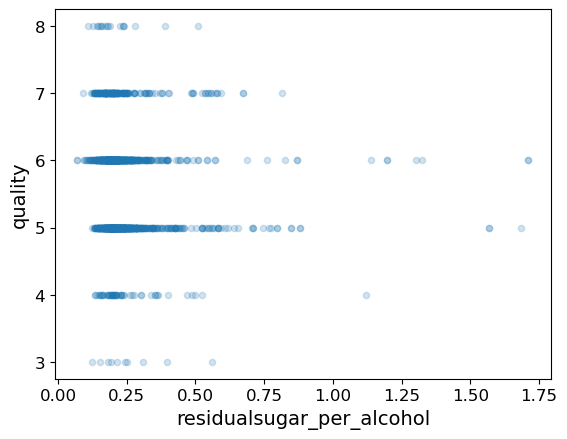

In [24]:
datos.plot(kind="scatter", x="residualsugar_per_alcohol", y="quality", alpha=0.2)

In [25]:
datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ph_per_density,sulphates_per_alcohol,residualsugar_per_alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,3.322032,0.063617,0.245503
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.157179,0.017533,0.142482
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,2.741096,0.028462,0.070866
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,3.218540,0.053333,0.183065
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,3.318462,0.060714,0.211111
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,3.415528,0.068835,0.254809
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,4.039977,0.212766,1.711111


## Entrenamiento de modelo
Modelo que determinaará la calidad del vino según unas características específicas

> Creación del modelo y entrenamiento

In [33]:
from sklearn.linear_model import LinearRegression

# Variable dependiente
y = datos["quality"]
# Variables independientes

x = datos[["alcohol","pH","citric acid","residual sugar", "sulphates", "volatile acidity", "total sulfur dioxide"]]

lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [34]:
datos_prueba = x.iloc[:5]
print("Prediciones: ", lin_reg.predict(datos_prueba))
y_reales = y.iloc[:5]
print("Reales: ", list(y_reales))



Prediciones:  [5.03603726 5.09540652 5.21233399 5.65127914 5.03603726]
Reales:  [5, 5, 5, 6, 5]


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicciones = lin_reg.predict(x)
mse = mean_squared_error(y, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y, predicciones)
score = r2_score(y, predicciones)
print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

# con todas las columnas mae: 49704.12411854149   mse: 68235.55069803342

mae: 0.5061896489627038   rmse: 0.6513388660311987 r2_score: 0.3490825349553611


Cuanto **más cerca esté del 1** la variable ***r2_score*** **más optimo** será el modelo

In [36]:
# cross-validation
from sklearn.model_selection import cross_val_score

lin_score = cross_val_score(lin_reg, x, y,
                            scoring = "neg_mean_squared_error", cv=10)
root_lin_score = np.sqrt(-lin_score)
print("Scores: ", root_lin_score)
print("Media: ", root_lin_score.mean())
print("Desviación Std", root_lin_score.std())

Scores:  [0.70271897 0.63294256 0.68871705 0.65640854 0.60074396 0.72971028
 0.63226741 0.65856378 0.61153896 0.70508604]
Media:  0.6618697530933385
Desviación Std 0.04108869328144165
